<a href="https://colab.research.google.com/github/Charliebond125/ANERGY_Project/blob/main/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import math
import os
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [3]:
# Data Visualisation
!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Charliebond125/ANERGY_Project/main/CE802_P3_Data.csv')

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98


In [5]:
df_copy = df

In [6]:
df_copy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98


In [7]:
# listing categorical and numerical columns

categorical_values = list(df_copy.select_dtypes(include=['object']).columns)
numerical_values = list(df_copy.select_dtypes(include=['float64', 'int64']).columns)

print('Categorical Attributes', categorical_values) ;print('Numerical Attributes', numerical_values)

Categorical Attributes ['F6', 'F10']
Numerical Attributes ['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'F8', 'F9', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'Target']


In [8]:
print('F6', df_copy.F6.value_counts(), sep='\n')
print('\n')
print('F10', df_copy.F10.value_counts(), sep='\n')

F6
Europe    393
USA       378
Rest      365
UK        364
Name: F6, dtype: int64


F10
Very low     307
High         307
Very high    306
Medium       294
Low          286
Name: F10, dtype: int64


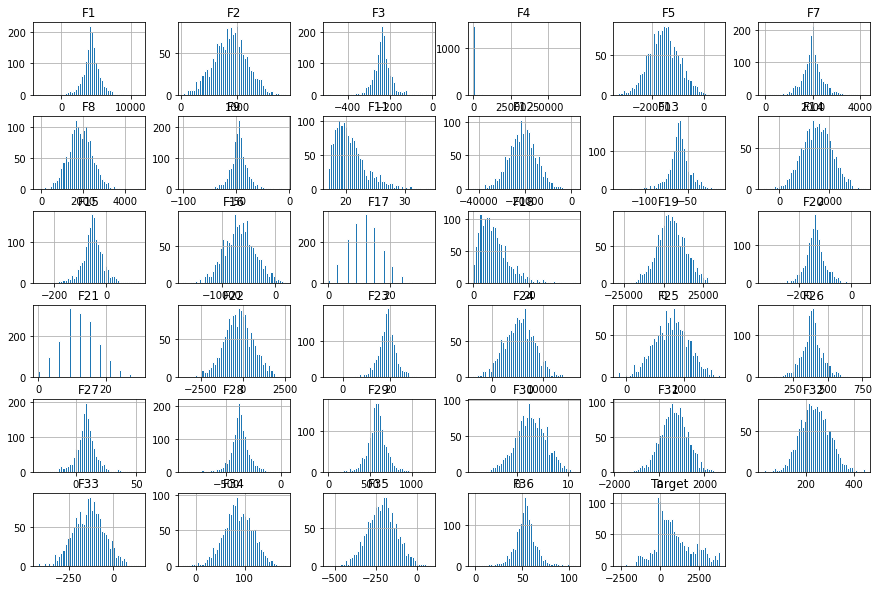

In [9]:
df_copy.hist(bins=50, figsize=(15, 10), ec='w')
plt.show()

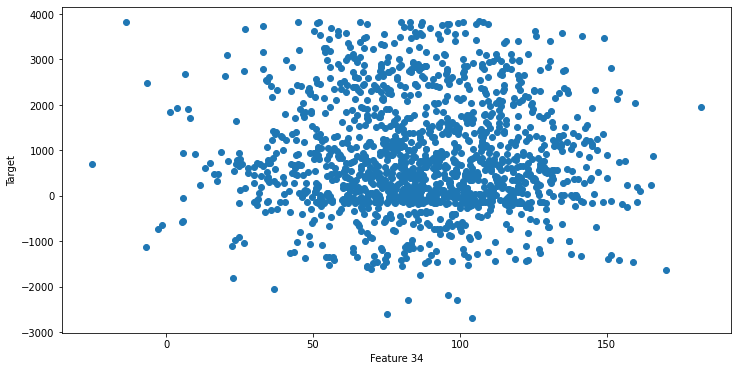

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df_copy['F34'], df_copy['Target'])
ax.set_xlabel('Feature 34')
ax.set_ylabel('Target')
plt.show()

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   int64  
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   int64  
 21  F22     1500 non-null   float64
 22  

In [12]:
# One hot encoding features

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False, categories='auto')

categorical_columns = ['F6', 'F10']

df_new = onehotencoder.fit_transform(df_copy[categorical_columns])

encoded_data = pd.DataFrame(df_new, index=df_copy.index)

concat = pd.concat([df_copy, encoded_data], axis=1)





In [13]:
df_encoded = concat
df_encoded.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,Target,0,1,2,3,4,5,6,7,8
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-42.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,396.38,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-13.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,3668.71,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-151.98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df_encoded = df_encoded.drop(['F6', 'F10'],axis=1)

In [15]:
# creating minmax scaling algorithm

def my_normalized_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df_encoded = my_normalized_data(df_encoded)

In [16]:
fig = px.box(df_encoded)
fig.show()

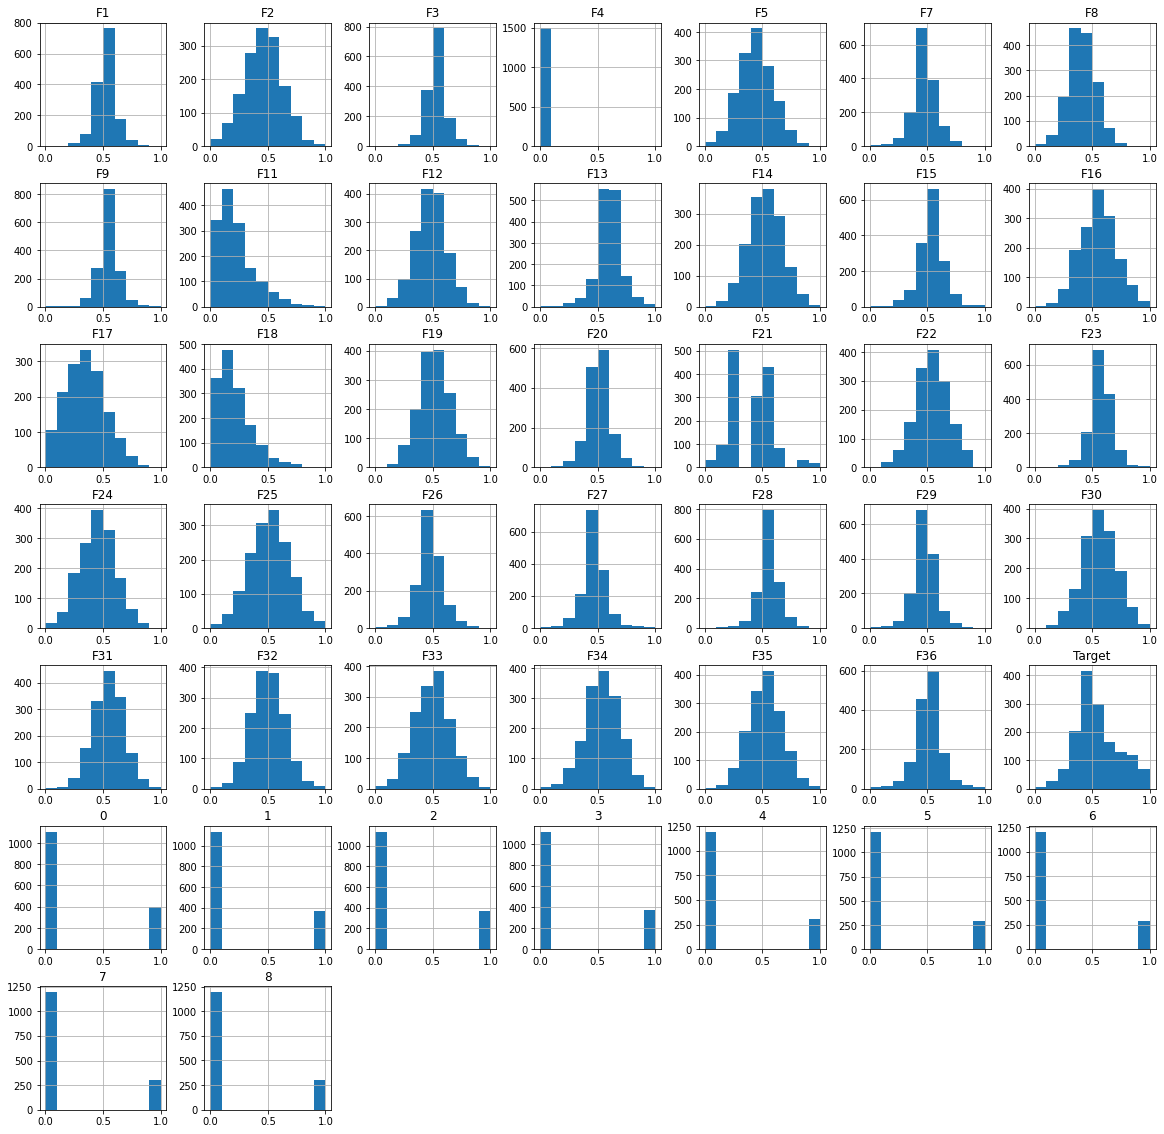

In [17]:
p_hist = df_encoded.hist(figsize=(20,20))

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F7      1500 non-null   float64
 6   F8      1500 non-null   float64
 7   F9      1500 non-null   float64
 8   F11     1500 non-null   float64
 9   F12     1500 non-null   float64
 10  F13     1500 non-null   float64
 11  F14     1500 non-null   float64
 12  F15     1500 non-null   float64
 13  F16     1500 non-null   float64
 14  F17     1500 non-null   float64
 15  F18     1500 non-null   float64
 16  F19     1500 non-null   float64
 17  F20     1500 non-null   float64
 18  F21     1500 non-null   float64
 19  F22     1500 non-null   float64
 20  F23     1500 non-null   float64
 21  F24     1500 non-null   float64
 22  

In [19]:
df_encoded.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F7        0
F8        0
F9        0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
dtype: int64

In [20]:
X = df_encoded.drop(['Target'], axis=1)

y = df_encoded['Target']

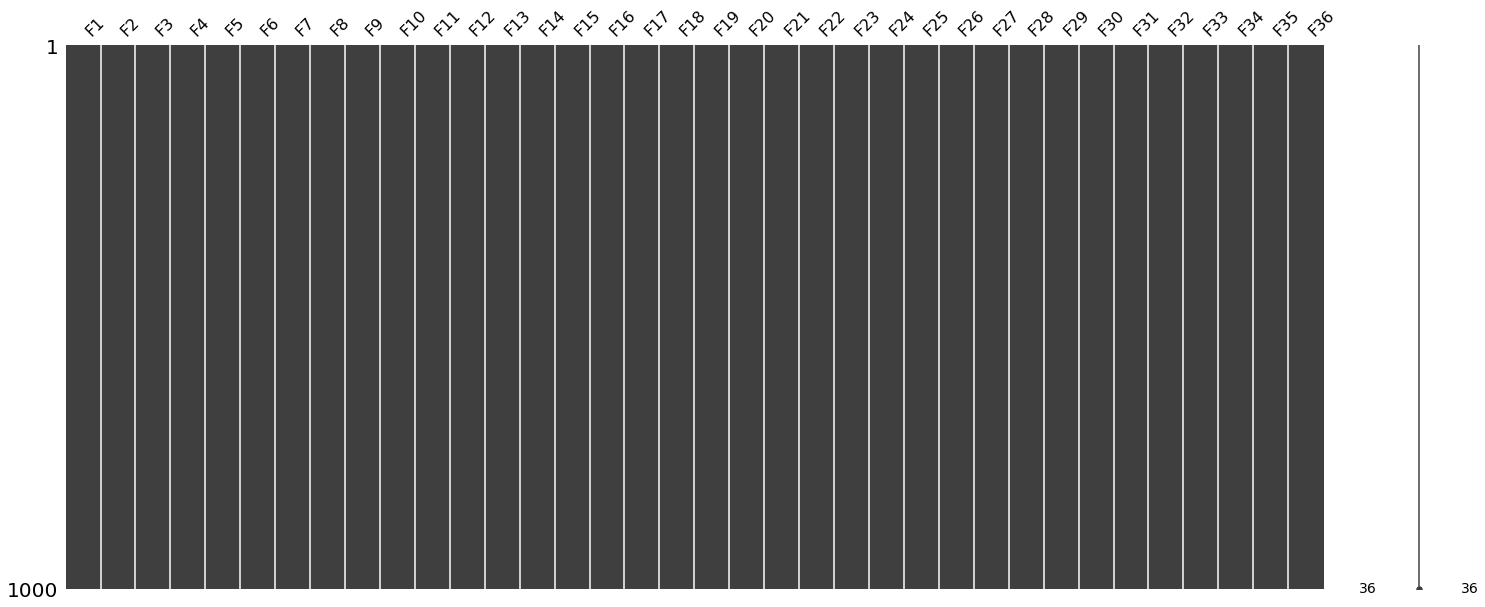

In [21]:
import missingno as msno

msno.matrix(df.drop('Target', axis='columns').sample(1000))

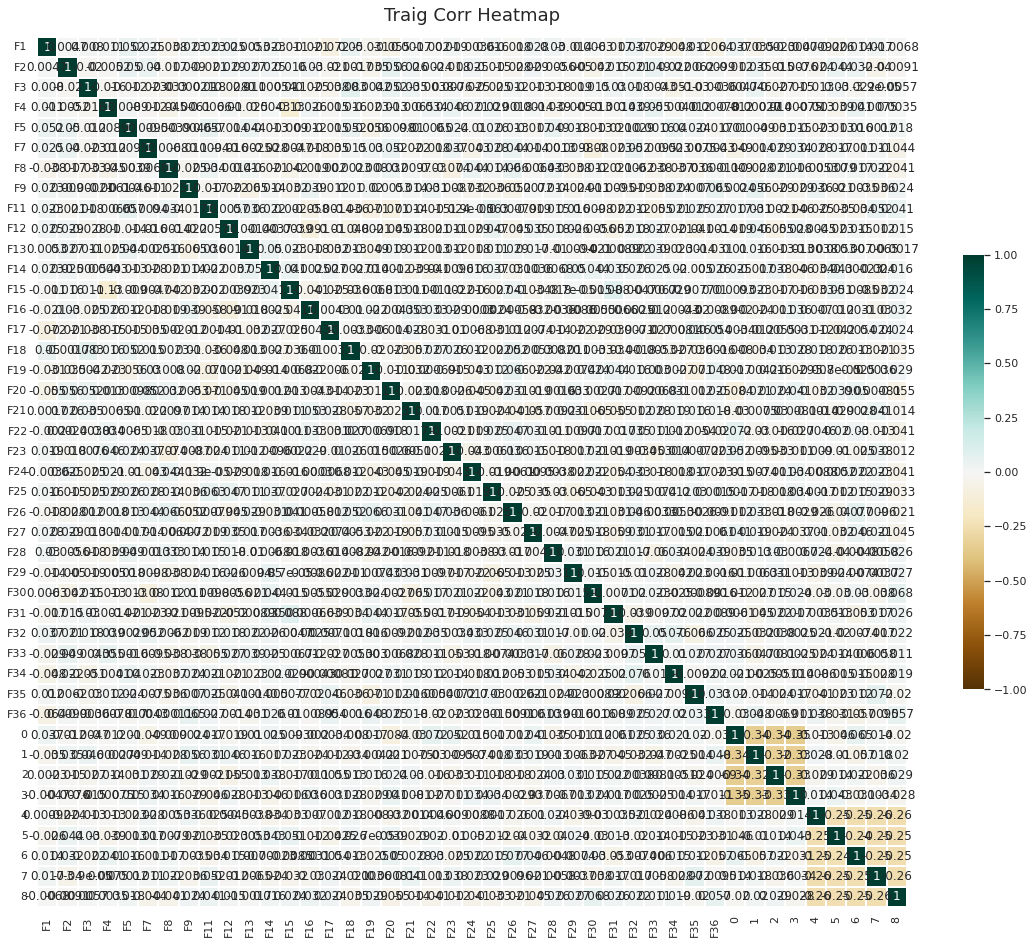

In [22]:
plt.figure(figsize=(20, 16))

#mask for upper triangle


sns.set_theme(style="white")

corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

heatmap = sns.heatmap(corr, vmin=-1, annot=True, cmap='BrBG', 
                      square=True, linewidths=1, cbar_kws={"shrink": .5})
heatmap.set_title('Traig Corr Heatmap', fontdict={'fontsize':18}, pad=16)

# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

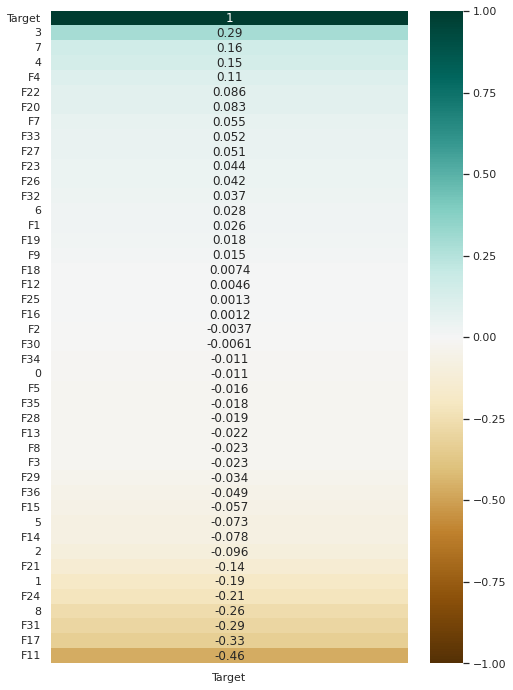

In [23]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df_encoded.corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [24]:
print(X.shape, y.shape)

(1500, 43) (1500,)


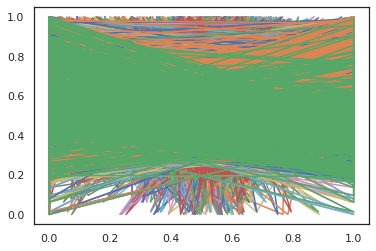

In [25]:
plt.plot(X, y)
plt.show()

In [26]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,4290.668180,1268.631888,-3316.23,3674.4375,4271.460,4906.1175,11224.83
F2,1500.0,873.843687,295.642000,40.77,672.0750,881.630,1071.1275,1843.77
F3,1500.0,-237.676927,42.300767,-493.16,-258.9875,-238.055,-217.0725,-10.97
F4,1500.0,221.516060,2111.721781,0.00,0.4200,3.255,23.9475,68126.16
F5,1500.0,-15619.793973,5843.806180,-33069.20,-19500.4950,-15645.850,-11705.8100,6213.90
F7,1500.0,1965.234653,433.264391,-78.38,1744.1300,1974.290,2180.4350,4195.27
F8,1500.0,1852.110960,579.053729,-145.70,1473.8800,1831.830,2241.5000,4704.90
F9,1500.0,-47.816413,8.455589,-100.04,-51.9100,-47.770,-43.8050,-4.26
F11,1500.0,20.859020,2.791098,16.99,18.8475,20.200,22.0450,34.26
F12,1500.0,-21264.485733,6037.089272,-42479.82,-25330.3250,-21196.040,-17434.5400,1590.34


In [27]:

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [28]:
"""

Next stage will be dimensionality reduction using IsoMap.

## NOTE: Change number of components: n_components = dimensions of 2.
                                      n_components = dimensions of 3.

## 3 dimensions are required to use in plotly.express 3D graphs.

"""

# import required libraries

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, MDS
from sklearn.metrics import pairwise_distances


kpca = KernelPCA()
isomap = Isomap(n_neighbors=20,
                  n_components=2,
                    eigen_solver='auto',
                      tol=0,
                        max_iter=None,
                          path_method='auto',
                        neighbors_algorithm='auto',
                      n_jobs=-1,
                    metric='minkowski',
                  p=2,
                metric_params=None
)   

X_dims_3 = isomap.fit_transform(X)

print('The new shape of X: ', X_dims_3.shape)




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning:

The number of connected components of the neighbors graph is 20 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



The new shape of X:  (1500, 2)


In [30]:
import plotly.express as px # for data visualization

X_trans3 = X_dims_3

fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))
fig.write_html('/content/drive/MyDrive/Graphs/isomap_3_dims.html')
fig.show()

IndexError: ignored

In [31]:
X_dims_3.shape

(1500, 2)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dims_3, y, random_state = 42, shuffle=True, test_size=0.2)

In [33]:
# Standardization and normalization

from sklearn.preprocessing import RobustScaler

robust = RobustScaler()

X_train = robust.fit_transform(X_train)
X_test = robust.fit_transform(X_test)

In [34]:
"""

Calculating variance with PCA

"""

# use of numpys cumsum funcionality

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42, shuffle=True, test_size=0.2)

Xtrain = robust.fit_transform(Xtrain)
Xtest = robust.fit_transform(Xtest)

covariance_matrix = np.cov(Xtrain.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [35]:
Xtrain.shape

(1200, 43)

In [36]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

yhat = model_IF.fit_predict(Xtrain)

mask = yhat != -1
Xtrain, ytrain = Xtrain[mask, :], ytrain[mask]

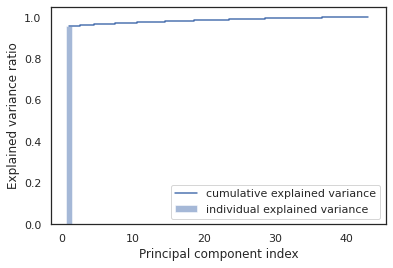

In [37]:
import matplotlib.pyplot as plt

import numpy as np

cov_mat = np.cov(Xtrain.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,44), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,44), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [38]:
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(1080, 43) (1080,) (300, 43) (300,)


In [39]:


from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
pca = PCA(n_components=2)
lr = LinearRegression(n_jobs=-1)

X_train_pca = pca.fit_transform(Xtrain)
X_test_pca = pca.transform(Xtest)
lr.fit(X_train_pca, ytrain)

LinearRegression(n_jobs=-1)

In [40]:
lr.predict(X_test)

array([0.57118697, 0.53668292, 0.51141646, 0.53639647, 0.51073954,
       0.51381218, 0.54961526, 0.56364668, 0.54778162, 0.56080061,
       0.56653505, 0.54187805, 0.53900675, 0.53853899, 0.5469577 ,
       0.55121067, 0.52328575, 0.56258956, 0.54947598, 0.55419353,
       0.56542751, 0.51768481, 0.55291669, 0.56215567, 0.55248214,
       0.56038239, 0.54031107, 0.54555264, 0.55347701, 0.51559469,
       0.55925614, 0.55623776, 0.54096539, 0.54841639, 0.54037341,
       0.53444303, 0.55547369, 0.54012846, 0.55211856, 0.54895866,
       0.5491759 , 0.54732499, 0.54367643, 0.55872052, 0.54129013,
       0.55599867, 0.5303205 , 0.5416758 , 0.53629924, 0.54405941,
       0.52362822, 0.55128164, 0.53333055, 0.54530827, 0.55567896,
       0.5498052 , 0.54811189, 0.54225054, 0.55715287, 0.55459904,
       0.54816867, 0.56739827, 0.53500441, 0.54853622, 0.51829107,
       0.546694  , 0.53503775, 0.54369431, 0.52461747, 0.54897132,
       0.5497052 , 0.55413869, 0.55439102, 0.53160714, 0.55911

In [42]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn import metrics 

metrics.mean_squared_error(y_pred, ytest, squared=False)


0.18481334408484923

In [43]:
metrics.r2_score(y_true= ytest, y_pred=y_pred)

-0.03574871286042702

In [44]:
metrics.mean_absolute_percentage_error(y_pred, ytest)

0.27040817556116525

In [45]:
y.shape

(1500,)

In [46]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_train)

'continuous'

In [47]:
y = np.array(y, dtype=float)

In [48]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [49]:
# evaluate logistic regression model on raw data
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

model = LinearRegression()

models = []
models.append(LinearRegression())
models.append(SVR())
models.append(KNeighborsRegressor())
models.append(RandomForestRegressor())

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('logistic', LinearRegression())
    ])

# pipeline = Pipeline([
#     ('vect', TfidfVectorizer(stop_words='english')),
#     ('clf', LogisticRegression())
# ])


for regressor in models:
    pipe.set_params(logistic = regressor)
    scores = cross_validate(pipe, Xtrain, ytrain, error_score='raise')
    print('---------------------------------')
    print(str(regressor))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LinearRegression()
-----------------------------------
fit_time  mean  0.024636554718017577
fit_time  std  0.00654702769220799
score_time  mean  0.0024947643280029295
score_time  std  0.001202715933336753
test_score  mean  0.680768592087398
test_score  std  0.043411820663566685
---------------------------------
SVR()
-----------------------------------
fit_time  mean  0.04873876571655274
fit_time  std  0.02944099590122253
score_time  mean  0.006841421127319336
score_time  std  0.0011115115786277685
test_score  mean  0.6998880764159194
test_score  std  0.010860479180936343
---------------------------------
KNeighborsRegressor()
-----------------------------------
fit_time  mean  0.012517833709716797
fit_time  std  0.004973455107490023
score_time  mean  0.006077432632446289
score_time  std  0.00022710115440518103
test_score  mean  0.2538031089010899
test_score  std  0.047889127570240636
---------------------------------
RandomForestRegressor()
----------

In [50]:
"""

Next stage is to set up a pipeline to chain together a PCA reduction method,
Then set up a logistic regressor to act as a baseline.

With this we can find out through GridSearch/RandomSearch the ideal principle components
where we will not lose information.

Another metric is to use Feature importance/Impurity Measure.

"""

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, RepeatedKFold


# Define Scaler to be used

pca = PCA()

scaler = RobustScaler()

cross_val = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

lr = LinearRegression()

pipe = Pipeline([("scaler", scaler),
                 ("pca", pca),
                 ("linear", lr)])

grid_params = {
    "pca__n_components": [5, 10, 15, 20, 25, 30, 35, 40, 43],
    "linear__n_jobs": [-1],
}

search = GridSearchCV(pipe,
                        grid_params,
                          n_jobs=-1,
                            verbose=3,
                          error_score='raise',
                        cv=cross_val,
                      scoring='neg_mean_squared_error')

search.fit(Xtrain, ytrain)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 50 folds for each of 9 candidates, totalling 450 fits
Best parameter (CV score=-0.011):
{'linear__n_jobs': -1, 'pca__n_components': 43}


In [51]:
y_pred = search.best_estimator_.predict(Xtest)

r2_score = metrics.r2_score(y_pred, ytest)
print(r2_score)


0.6306273506388981


In [52]:
""" 
PCA has appeared to not make any improvement in our modelling capabilities. 

My next feature reduction method will be using feature importance/impurity measure.

A mix of both will be a good idea in how many features to include in our training and testing sets.

For this, an OOB (Out-Of-Bag) measure will be used.

"""

# Constructing our feature importances using a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100)

rf_regressor.fit(Xtrain, ytrain)

rf_regressor.feature_importances_

array([0.00719242, 0.00814198, 0.01166685, 0.16417471, 0.00802986,
       0.00802858, 0.00834848, 0.00696854, 0.21438241, 0.00716174,
       0.00938504, 0.00944314, 0.01411174, 0.00783344, 0.0618717 ,
       0.00854851, 0.00793902, 0.01084717, 0.00839765, 0.0115232 ,
       0.00726396, 0.04280728, 0.00782589, 0.00815285, 0.00860058,
       0.00857838, 0.00903056, 0.00773042, 0.08670591, 0.00930985,
       0.0090254 , 0.01064676, 0.008095  , 0.00702654, 0.03349561,
       0.03171693, 0.0122747 , 0.0595339 , 0.00268757, 0.00329158,
       0.00088552, 0.00877847, 0.02254018])

In [53]:
feature_scores = pd.Series(rf_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

F11    0.214382
F4     0.164175
F31    0.086706
F17    0.061872
3      0.059534
F24    0.042807
0      0.033496
1      0.031717
8      0.022540
F15    0.014112
2      0.012275
F3     0.011667
F22    0.011523
F20    0.010847
F34    0.010647
F14    0.009443
F13    0.009385
F32    0.009310
F29    0.009031
F33    0.009025
7      0.008778
F27    0.008601
F28    0.008578
F18    0.008549
F21    0.008398
F8     0.008348
F26    0.008153
F2     0.008142
F35    0.008095
F5     0.008030
F7     0.008029
F19    0.007939
F16    0.007833
F25    0.007826
F30    0.007730
F23    0.007264
F1     0.007192
F12    0.007162
F36    0.007027
F9     0.006969
5      0.003292
4      0.002688
6      0.000886
dtype: float64

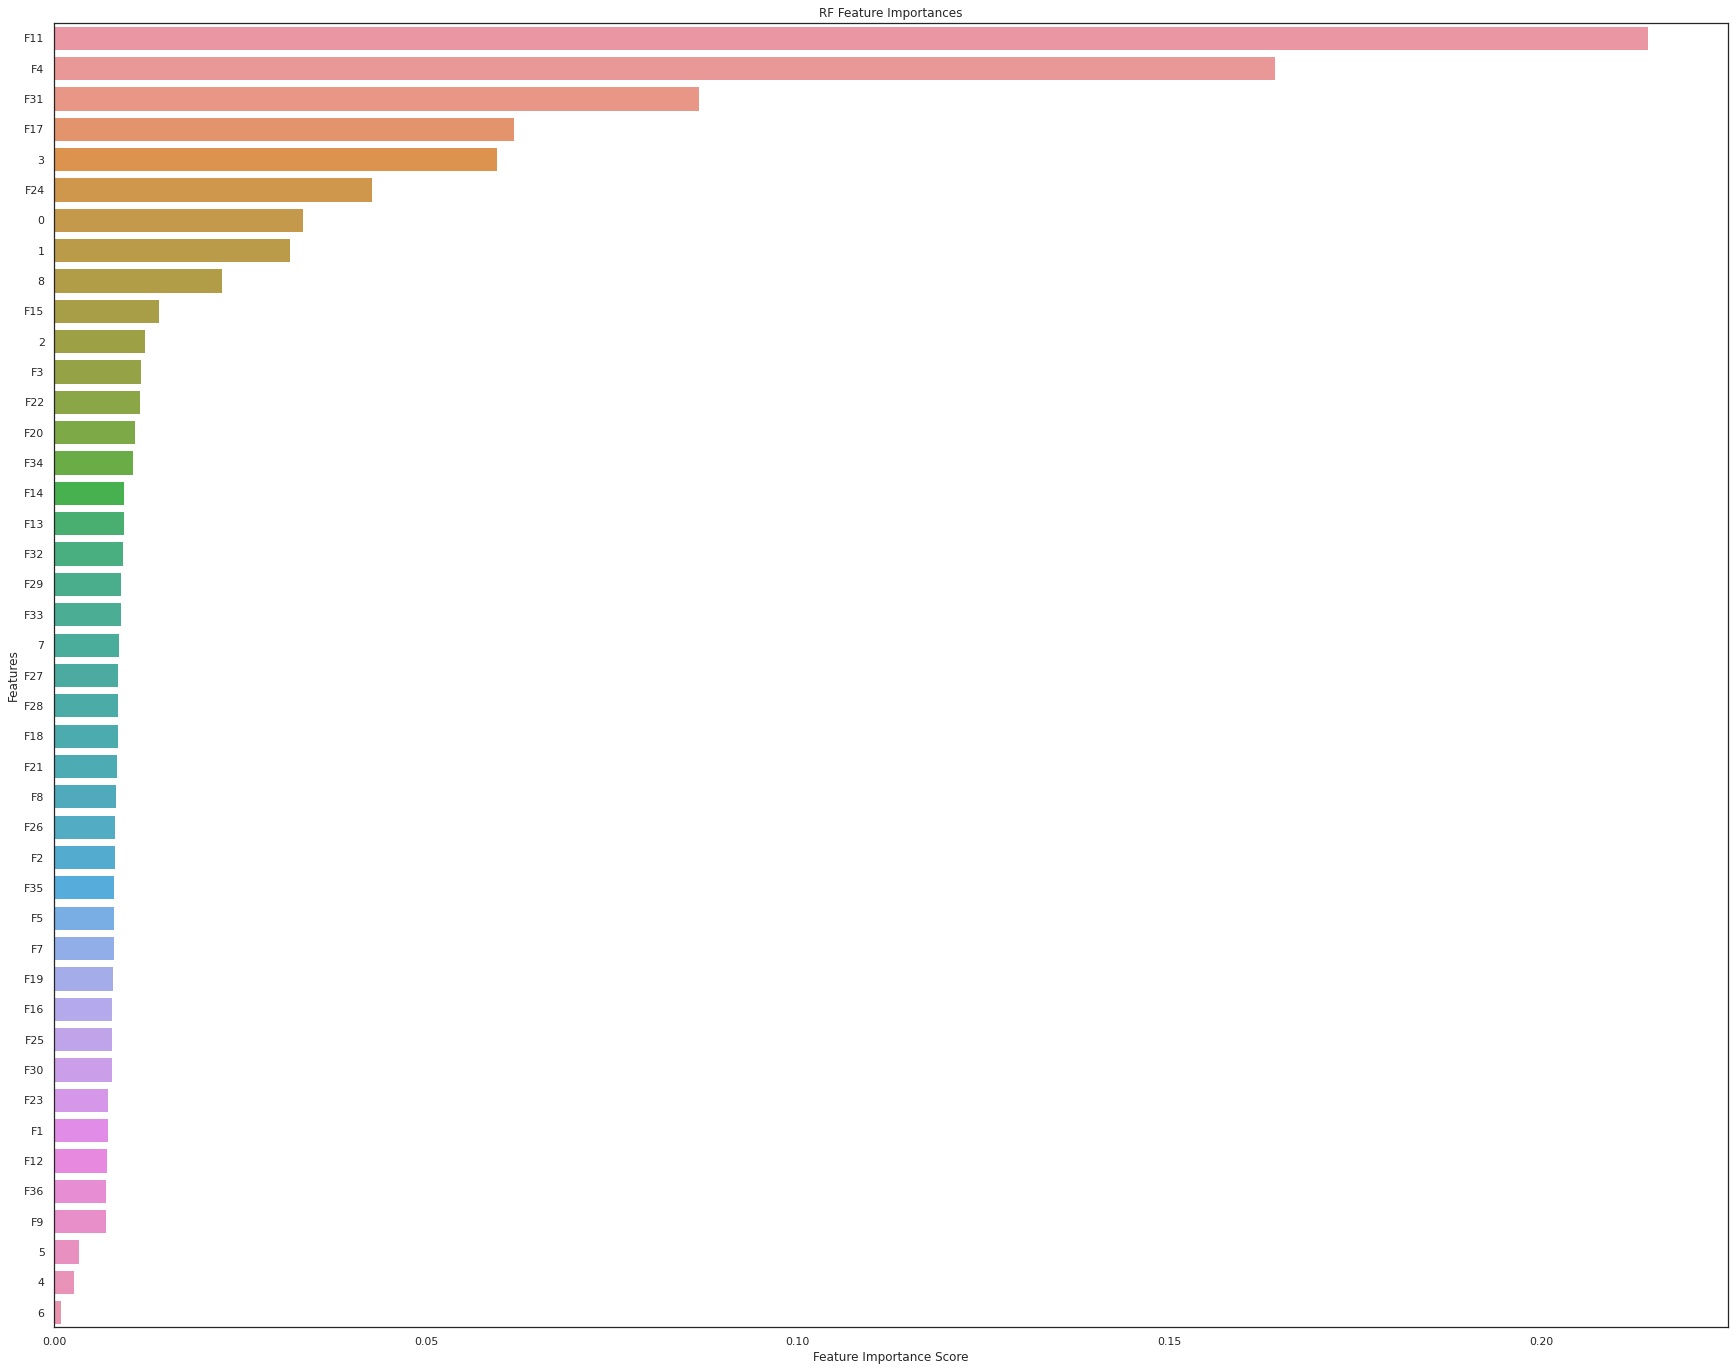

<Figure size 432x288 with 0 Axes>

In [54]:
# lets plot the feature importances

f, ax = plt.subplots(figsize = (30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("RF Feature Importances")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()
plt.savefig('/content/drive/MyDrive/Graphs/RF_Regressor_Feature_importance.png')

Feature: 0, Score: 0.01136
Feature: 1, Score: 0.00750
Feature: 2, Score: 0.01148
Feature: 3, Score: 0.16863
Feature: 4, Score: 0.00374
Feature: 5, Score: 0.01048
Feature: 6, Score: 0.00459
Feature: 7, Score: 0.00575
Feature: 8, Score: 0.20464
Feature: 9, Score: 0.01090
Feature: 10, Score: 0.01484
Feature: 11, Score: 0.00565
Feature: 12, Score: 0.02315
Feature: 13, Score: 0.00535
Feature: 14, Score: 0.07737
Feature: 15, Score: 0.00517
Feature: 16, Score: 0.00566
Feature: 17, Score: 0.00775
Feature: 18, Score: 0.01360
Feature: 19, Score: 0.00485
Feature: 20, Score: 0.00725
Feature: 21, Score: 0.03577
Feature: 22, Score: 0.00200
Feature: 23, Score: 0.00394
Feature: 24, Score: 0.00546
Feature: 25, Score: 0.00244
Feature: 26, Score: 0.01366
Feature: 27, Score: 0.00215
Feature: 28, Score: 0.09509
Feature: 29, Score: 0.00926
Feature: 30, Score: 0.00871
Feature: 31, Score: 0.00852
Feature: 32, Score: 0.00396
Feature: 33, Score: 0.00300
Feature: 34, Score: 0.02852
Feature: 35, Score: 0.05541
Fe

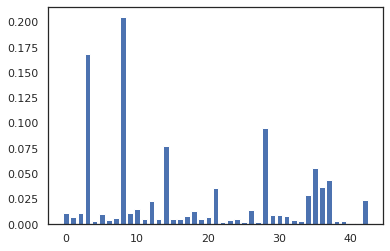

In [55]:
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(Xtrain, ytrain)

tree_importance = tree.feature_importances_

for i, v in enumerate(tree_importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(tree_importance))], tree_importance)
plt.show()

In [56]:
tree_feature_scores = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
tree_feature_scores

F11    0.204641
F4     0.168627
F31    0.095086
F17    0.077372
1      0.055415
3      0.043645
2      0.036633
F24    0.035773
0      0.028520
8      0.023639
F15    0.023155
F13    0.014840
F29    0.013660
F21    0.013600
F3     0.011485
F1     0.011358
F12    0.010904
F7     0.010476
F32    0.009259
F33    0.008708
F34    0.008521
F20    0.007748
F2     0.007502
F23    0.007249
F9     0.005749
F19    0.005661
F14    0.005647
F27    0.005460
F16    0.005346
F18    0.005168
F22    0.004846
F8     0.004594
F35    0.003957
F26    0.003941
F5     0.003735
4      0.003466
5      0.003405
F36    0.003000
F28    0.002442
F30    0.002147
F25    0.002003
7      0.001007
6      0.000612
dtype: float64

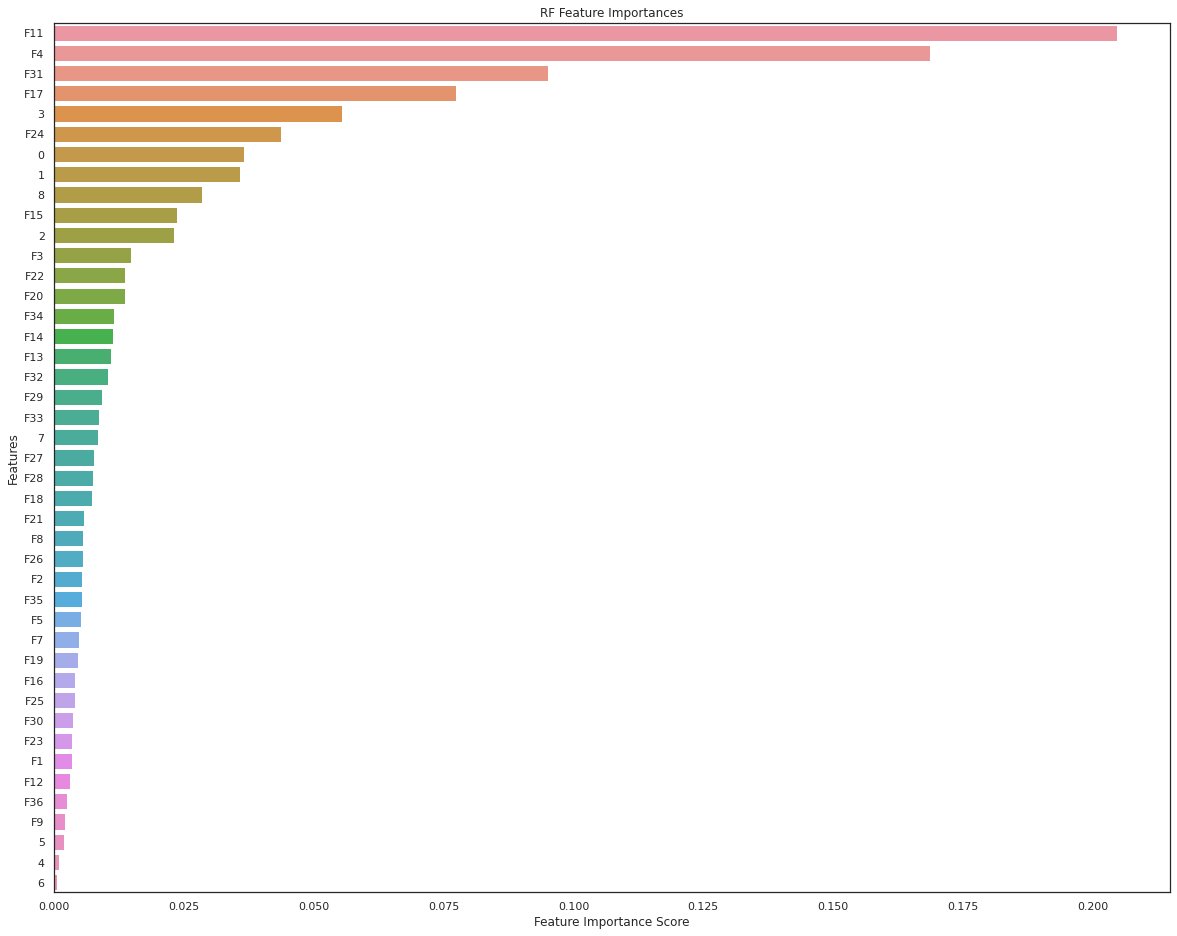

<Figure size 432x288 with 0 Axes>

In [57]:
f, ax = plt.subplots(figsize = (20, 16))
ax = sns.barplot(x=tree_feature_scores, y=tree_feature_scores.index, data=df)
ax.set_title("RF Feature Importances")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()
plt.savefig('/content/drive/MyDrive/Graphs/DT_Regressor_Feature_importance.png')

[05:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00117
Feature: 1, Score: 0.00433
Feature: 2, Score: 0.00807
Feature: 3, Score: 0.08720
Feature: 4, Score: 0.00647
Feature: 5, Score: 0.01040
Feature: 6, Score: 0.00357
Feature: 7, Score: 0.00374
Feature: 8, Score: 0.10052
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00743
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01884
Feature: 13, Score: 0.00364
Feature: 14, Score: 0.06606
Feature: 15, Score: 0.00858
Feature: 16, Score: 0.00851
Feature: 17, Score: 0.01202
Feature: 18, Score: 0.02457
Feature: 19, Score: 0.00902
Feature: 20, Score: 0.01013
Feature: 21, Score: 0.03810
Feature: 22, Score: 0.00552
Feature: 23, Score: 0.01204
Feature: 24, Score: 0.00271
Feature: 25, Score: 0.00432
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00733
Feature: 28, Score: 0.04864
Feature: 29, Score: 0.00465
Feature: 30, Score: 0.00260
Feature: 31, Sc

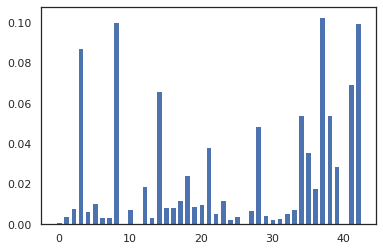

In [58]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()

xgboost_regressor.fit(Xtrain, ytrain)

xg_importances = xgboost_regressor.feature_importances_

# summarize feature importance
for i,v in enumerate(xg_importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(xg_importances))], xg_importances)
plt.show()

In [59]:
xgboost_feature_scores = pd.Series(xgboost_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
xgboost_feature_scores


3      0.102707
F11    0.100518
8      0.099887
F4     0.087201
7      0.069555
F17    0.066063
0      0.054285
4      0.053972
F31    0.048637
F24    0.038100
1      0.035979
5      0.028821
F21    0.024571
F15    0.018837
2      0.017894
F26    0.012038
F20    0.012018
F7     0.010402
F23    0.010128
F22    0.009019
F18    0.008579
F19    0.008508
F3     0.008069
F36    0.007685
F13    0.007426
F30    0.007327
F5     0.006473
F35    0.005685
F25    0.005517
F32    0.004650
F2     0.004330
F28    0.004320
F9     0.003739
F16    0.003636
F8     0.003571
F34    0.003364
F27    0.002714
F33    0.002605
F1     0.001169
F14    0.000000
6      0.000000
F12    0.000000
F29    0.000000
dtype: float32

In [60]:
regression_feature_scores = pd.DataFrame(xgboost_feature_scores, index=xgboost_feature_scores.index)

In [61]:
forest_feature_scores = feature_scores

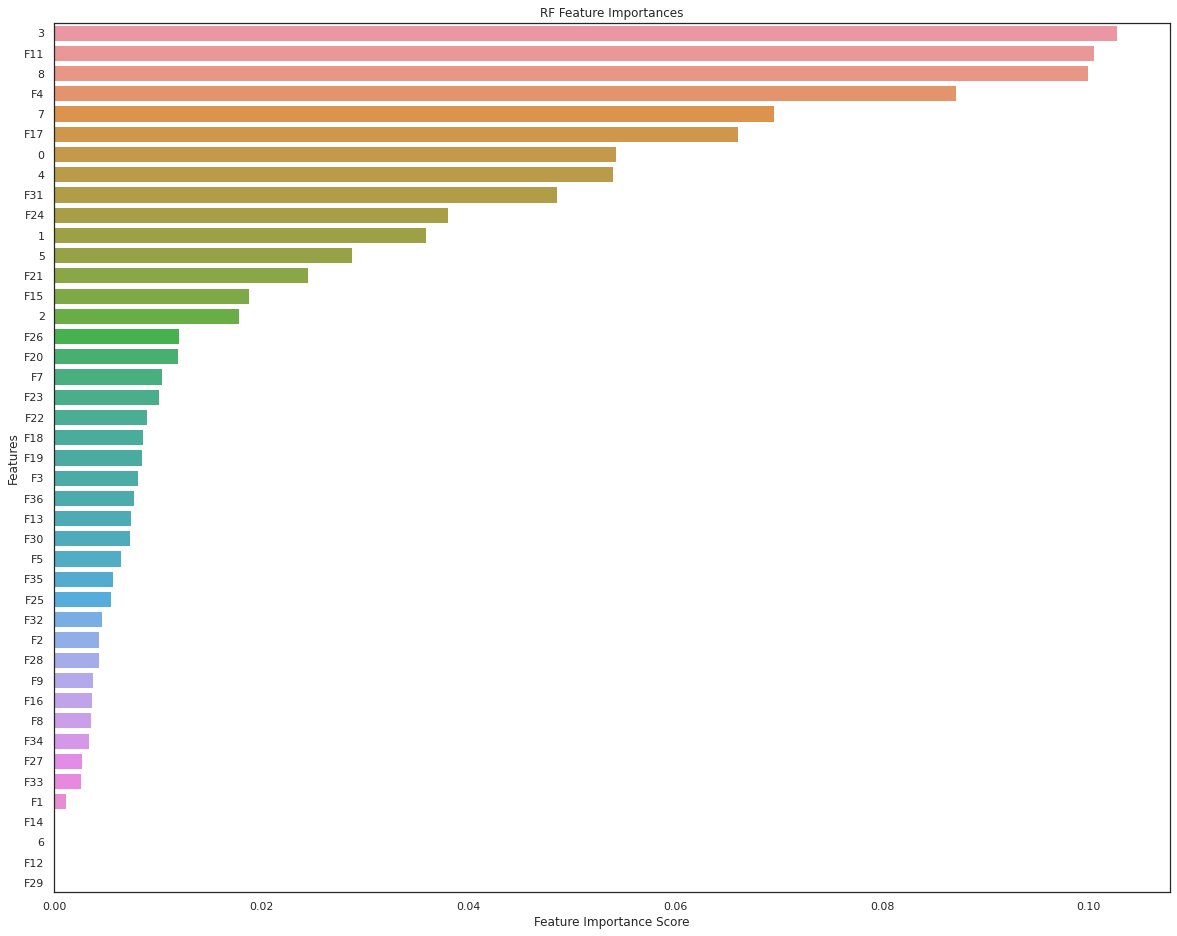

<Figure size 432x288 with 0 Axes>

In [62]:
f, ax = plt.subplots(figsize = (20, 16))
ax = sns.barplot(x=xgboost_feature_scores, y=xgboost_feature_scores.index, data=df)
ax.set_title("RF Feature Importances")
ax.set_yticklabels(xgboost_feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()
plt.savefig('/content/drive/MyDrive/Graphs/XGBoost_Regressor_Feature_importance.png')

In [63]:
y_pred = xgboost_regressor.predict(Xtest)

metrics.r2_score(y_pred, ytest)

0.6675730229896627

In [64]:
feature_importance_df = pd.concat([tree_feature_scores, feature_scores , xgboost_feature_scores], axis=1)

In [65]:
tree_feature_scores_df = pd.DataFrame(tree_feature_scores,  index= tree_feature_scores.index)

In [66]:
feature_scores_df = pd.DataFrame(feature_scores, index=feature_scores.index)
xgboost_feature_scores_df = pd.DataFrame(xgboost_feature_scores, index=xgboost_feature_scores)

In [67]:
merged_df = pd.DataFrame(feature_importance_df, index=feature_importance_df.index)

In [68]:
merged_df = merged_df.T

In [69]:
merged_df.head()

,F11,F4,F31,F17,1,3,2,F24,0,8,...,F26,F5,4,5,F36,F28,F30,F25,7,6
0,0.204641,0.168627,0.095086,0.077372,0.055415,0.043645,0.036633,0.035773,0.028520,0.023639,...,0.003941,0.003735,0.003466,0.003405,0.003000,0.002442,0.002147,0.002003,0.001007,0.000612
1,0.214382,0.164175,0.086706,0.061872,0.031717,0.059534,0.012275,0.042807,0.033496,0.022540,...,0.008153,0.008030,0.002688,0.003292,0.007027,0.008578,0.007730,0.007826,0.008778,0.000886
2,0.100518,0.087201,0.048637,0.066063,0.035979,0.102707,0.017894,0.038100,0.054285,0.099887,...,0.012038,0.006473,0.053972,0.028821,0.007685,0.004320,0.007327,0.005517,0.069555,0.000000


In [70]:
"""

Let us begin trimming the dataset. From the modelling of feature importances.

This should have an effect on our accuracy.

"""

trim_df = merged_df.iloc[:, 0:15]
print(trim_df.shape)

# Here we can see the perfect shape of features we want, we will be selecting the top 15 features for our model.

df_copy = df_encoded

# df_copy.loc[:, [trim_df]].head()

(3, 15)


In [71]:
trim_df.dtypes

F11    float64
F4     float64
F31    float64
F17    float64
1      float64
3      float64
2      float64
F24    float64
0      float64
8      float64
F15    float64
F13    float64
F29    float64
F21    float64
F3     float64
dtype: object

In [72]:
trim_data = trim_df.columns.tolist()



In [73]:
trimmed_df = df_copy[df_copy.columns.intersection(trim_data)]

In [74]:
trimmed_df

,F3,F4,F11,F13,F15,F17,F21,F24,F29,F31,0,1,2,3,8
0,0.594724,0.002281,0.326578,0.802479,0.503871,0.363636,0.2,0.709763,0.469630,0.702394,0.0,1.0,0.0,0.0,1.0
1,0.570812,0.000077,0.339896,0.357360,0.601923,0.454545,0.3,0.505099,0.416899,0.582112,0.0,0.0,0.0,1.0,0.0
2,0.587486,0.000038,0.199189,0.658068,0.539067,0.454545,0.5,0.521760,0.780598,0.653441,0.0,0.0,0.0,1.0,0.0
3,0.361351,0.000577,0.050955,0.733940,0.508588,0.272727,0.4,0.515564,0.470493,0.337768,0.0,0.0,0.0,1.0,0.0
4,0.474274,0.000019,0.077012,0.576378,0.467521,0.727273,0.3,0.510648,0.505064,0.699286,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.551007,0.000036,0.050955,0.533384,0.672725,0.363636,0.3,0.266414,0.671537,0.517966,1.0,0.0,0.0,0.0,0.0
1496,0.583069,0.002154,0.086856,0.626960,0.774904,0.363636,0.5,0.273161,0.449228,0.687560,1.0,0.0,0.0,0.0,0.0
1497,0.497003,0.001778,0.028373,0.670713,0.535222,0.363636,0.4,0.494397,0.531627,0.379362,0.0,0.0,0.0,1.0,0.0
1498,0.638192,0.000104,0.331210,0.570814,0.652576,0.181818,0.2,0.187670,0.512702,0.482592,0.0,1.0,0.0,0.0,1.0


In [75]:
X = trimmed_df
y = df_encoded['Target']

In [76]:
print(X.shape, y.shape)

(1500, 15) (1500,)


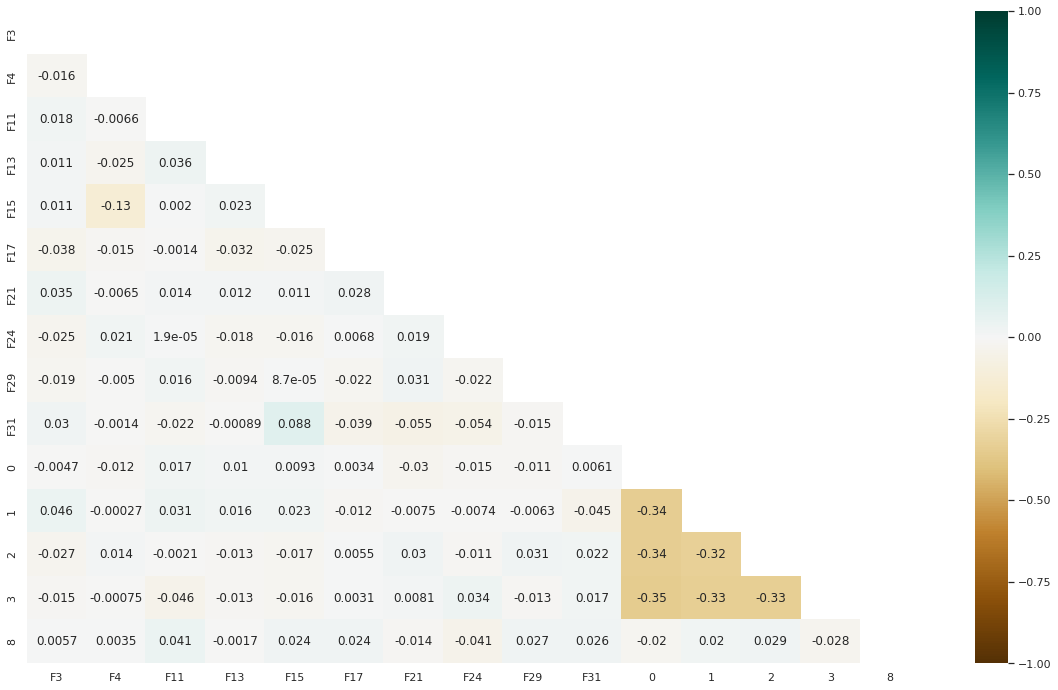

In [77]:
plt.figure(figsize=(20, 12))

corr = X.corr()

mask = np.triu(np.ones_like(corr))

sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

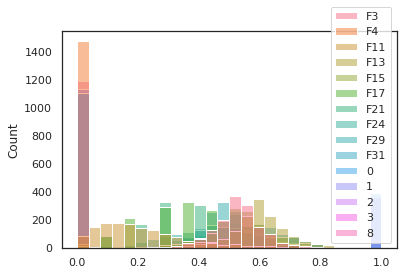

In [78]:
sns.histplot(data=X)

In [ ]:
cols_plot = ['F31', 'F7', 'F4', 'F11', 'F13', 'F15', 'F17', 'F21', 'F24', 'F29']

sns.pairplot(X[cols_plot], 
             kind='reg', 
             plot_kws={'line_kws': {'color': 'red'}}, 
             diag_kws={'color':'red'})
plt.show()

In [80]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
F3,1500.0,0.529839,0.087726,0.0,0.485644,0.529055,0.572570,1.0
F4,1500.0,0.003252,0.030997,0.0,0.000006,0.000048,0.000352,1.0
F11,1500.0,0.224031,0.161615,0.0,0.107556,0.185871,0.292704,1.0
F13,1500.0,0.597607,0.109457,0.0,0.548558,0.600152,0.652757,1.0
F15,1500.0,0.533902,0.110960,0.0,0.479287,0.535568,0.592310,1.0
F17,1500.0,0.361576,0.159619,0.0,0.272727,0.363636,0.454545,1.0
F21,1500.0,0.396933,0.182938,0.0,0.300000,0.400000,0.500000,1.0
F24,1500.0,0.452363,0.151376,0.0,0.348076,0.455598,0.554304,1.0
F29,1500.0,0.478521,0.101410,0.0,0.427285,0.477811,0.528349,1.0
F31,1500.0,0.545401,0.132671,0.0,0.459344,0.545109,0.632218,1.0


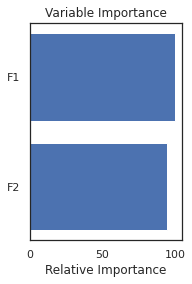

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

clf = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [82]:
from sklearn.preprocessing import PowerTransformer, RobustScaler

transformer = PowerTransformer()
scaler = RobustScaler()


numerical_pipeline = Pipeline([('transformer', PowerTransformer()),
                                ('scaler', RobustScaler())])

train = numerical_pipeline.fit_transform(X)
train.shape

(1500, 15)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=42, shuffle=True)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

scaler = RobustScaler()

model = LinearRegression()

models = []
models.append(LinearRegression())
models.append(SVR())
models.append(KNeighborsRegressor())
models.append(RandomForestRegressor())
models.append(BayesianRidge())
models.append(GradientBoostingRegressor())
models.append(XGBRegressor())

pipe = Pipeline([('logistic', LinearRegression())
    ])


for regressor in models:
    pipe.set_params(logistic = regressor)
    scores = cross_validate(pipe, X_train, y_train, error_score='raise')
    print('---------------------------------')
    print(str(regressor))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())


In [84]:
svr = SVR()
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [85]:
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [88]:
bayes = BayesianRidge()
bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

In [89]:
gradient = GradientBoostingRegressor()
gradient.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [90]:
xg = (XGBRegressor())
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [87]:
from sklearn.model_selection import RandomizedSearchCV
""" 

I will take the models that got above 70 on the test score. This is an increase
compared to earlier cross_validations on dataset with all features

"""

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# creating a function to iterate through each regressor and pull best performing
# model parameters. 

# setting up the parameters for each regressor

cross_val = RepeatedKFold(n_splits=10, n_repeats=10)

pipeline_1 = Pipeline([
                    ('linear', LinearRegression())]) # baseline

parameters_1 = {'linear__copy_X': [True],
                  'linear__fit_intercept': [True],
                    'linear__n_jobs': [None],
                  'linear__normalize': ['deprecated'],
                'linear__positive': [False]}

linear_gs = GridSearchCV(pipeline_1, 
                         parameters_1,
                         scoring='neg_root_mean_squared_error',
                         cv=cross_val,
                         verbose=3, 
                         n_jobs=-1, error_score='raise')

linear_gs.fit(X_train, y_train)
print("Best parameters from randomsearch: {}".format(linear_gs.best_params_))
print("CV score=%0.3f" % linear_gs.best_score_)





Fitting 100 folds for each of 1 candidates, totalling 100 fits
Best parameters from randomsearch: {'linear__copy_X': True, 'linear__fit_intercept': True, 'linear__n_jobs': None, 'linear__normalize': 'deprecated', 'linear__positive': False}
CV score=-0.103


In [91]:
linear_ypred = linear_gs.predict(X_test)

linear_true = metrics.mean_squared_error(linear_ypred, y_test)
print(linear_true)

0.008659001629652791


In [92]:
X_train.dtype

dtype('float64')

In [93]:
pipeline_2 = Pipeline([
                    ('svr', SVR())])

parameters_2 = {'svr__C': np.linspace(0.1,1.2,12),
                  'svr__cache_size': [200],
                    'svr__coef0': [0.0],
                      'svr__degree': [2,3,4],
                        'svr__epsilon': [0.1],
                        'svr__gamma': ['auto'],
                        'svr__kernel': ['rbf'],
                      'svr__max_iter': [-1],
                    'svr__shrinking': [True],
                  'svr__tol': [0.001],
                'svr__verbose': [False]}

svr_gs = GridSearchCV(pipeline_2, 
                         parameters_2,
                         scoring='neg_mean_squared_error',
                         cv=cross_val,
                         verbose=3, 
                         n_jobs=-1, error_score='raise')

svr_gs.fit(X_train, y_train)
print("Best parameters from randomsearch: {}".format(svr_gs.best_params_))
print("CV score=%0.3f" % svr_gs.best_score_)


Fitting 100 folds for each of 36 candidates, totalling 3600 fits
Best parameters from randomsearch: {'svr__C': 0.5, 'svr__cache_size': 200, 'svr__coef0': 0.0, 'svr__degree': 2, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf', 'svr__max_iter': -1, 'svr__shrinking': True, 'svr__tol': 0.001, 'svr__verbose': False}
CV score=-0.009


In [94]:
svr_ypred = svr_gs.predict(X_test)
metrics.mean_squared_error(svr_ypred, y_test)

0.00850910895217707

In [95]:
pipeline_3 = Pipeline([
                    ('bayesridge', BayesianRidge())])


parameters_3 = {'bayesridge__alpha_1': [1e-06],
                  'bayesridge__alpha_2': [1e-06],
                    'bayesridge__alpha_init': [None],
                      'bayesridge__compute_score': [False],
                        'bayesridge__copy_X': [True],
                          'bayesridge__fit_intercept': [True],
                            'bayesridge__lambda_1': [1e-06],
                          'bayesridge__lambda_2': [1e-06],
                        'bayesridge__lambda_init': [None],
                      'bayesridge__n_iter': [300],
                    'bayesridge__normalize': ['deprecated'],
                  'bayesridge__tol': [0.001],
                'bayesridge__verbose': [False]}

ridge_gs = GridSearchCV(pipeline_3, 
                         parameters_3,
                         scoring='neg_mean_squared_error',
                         cv=cross_val,
                         verbose=3, 
                         n_jobs=-1, error_score='raise')

ridge_gs.fit(X_train, y_train)
print("Best parameters from randomsearch: {}".format(ridge_gs.best_params_))
print("CV score=%0.3f" % ridge_gs.best_score_)


Fitting 100 folds for each of 1 candidates, totalling 100 fits
Best parameters from randomsearch: {'bayesridge__alpha_1': 1e-06, 'bayesridge__alpha_2': 1e-06, 'bayesridge__alpha_init': None, 'bayesridge__compute_score': False, 'bayesridge__copy_X': True, 'bayesridge__fit_intercept': True, 'bayesridge__lambda_1': 1e-06, 'bayesridge__lambda_2': 1e-06, 'bayesridge__lambda_init': None, 'bayesridge__n_iter': 300, 'bayesridge__normalize': 'deprecated', 'bayesridge__tol': 0.001, 'bayesridge__verbose': False}
CV score=-0.011


In [96]:
ridge_ypred = ridge_gs.predict(X_test)

metrics.mean_squared_error(ridge_ypred, y_test)

0.008654733159338861

In [97]:
pipeline_4 = Pipeline([
                    ('gradientboost', GradientBoostingRegressor())])


parameters_4 = {'gradientboost__alpha': [0.9],
                'gradientboost__ccp_alpha': [0.0],
                  'gradientboost__criterion': ['friedman_mse'],
                      'gradientboost__init': [None],
                        'gradientboost__learning_rate': [0.1],
                          'gradientboost__loss': ['squared_error'],
                            'gradientboost__max_depth': [3],
                              'gradientboost__max_features': [None],
                                'gradientboost__max_leaf_nodes': [None],
                                  'gradientboost__min_impurity_decrease': [0.0],
                                    'gradientboost__min_samples_leaf': [1],
                                    'gradientboost__min_samples_split': [2],
                                    'gradientboost__min_weight_fraction_leaf': [0.0],
                                  'gradientboost__n_estimators': [100],
                                'gradientboost__n_iter_no_change': [None],
                              'gradientboost__random_state': [None],
                            'gradientboost__subsample': [1.0],
                          'gradientboost__tol': [0.0001],
                        'gradientboost__validation_fraction': [0.1],
                      'gradientboost__verbose': [0],
                    'gradientboost__warm_start': [False]}

gradboost_gs = GridSearchCV(pipeline_4, 
                         parameters_4,
                         scoring='neg_mean_squared_error',
                         cv=cross_val,
                         verbose=3, 
                         n_jobs=-1, error_score='raise')

gradboost_gs.fit(X_train, y_train)
print("Best parameters from randomsearch: {}".format(gradboost_gs.best_params_))
print("CV score=%0.3f" % gradboost_gs.best_score_)


Fitting 100 folds for each of 1 candidates, totalling 100 fits
Best parameters from randomsearch: {'gradientboost__alpha': 0.9, 'gradientboost__ccp_alpha': 0.0, 'gradientboost__criterion': 'friedman_mse', 'gradientboost__init': None, 'gradientboost__learning_rate': 0.1, 'gradientboost__loss': 'squared_error', 'gradientboost__max_depth': 3, 'gradientboost__max_features': None, 'gradientboost__max_leaf_nodes': None, 'gradientboost__min_impurity_decrease': 0.0, 'gradientboost__min_samples_leaf': 1, 'gradientboost__min_samples_split': 2, 'gradientboost__min_weight_fraction_leaf': 0.0, 'gradientboost__n_estimators': 100, 'gradientboost__n_iter_no_change': None, 'gradientboost__random_state': None, 'gradientboost__subsample': 1.0, 'gradientboost__tol': 0.0001, 'gradientboost__validation_fraction': 0.1, 'gradientboost__verbose': 0, 'gradientboost__warm_start': False}
CV score=-0.008


In [98]:
gradboost_ypred = gradboost_gs.predict(X_test)
metrics.mean_squared_error(gradboost_ypred, y_test)

0.006678278841316831

In [99]:
# to get around problems relating to XGBoost and a known bug, you have to pass in numpy arrays

train = np.asarray(train)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=42, shuffle=True)

In [194]:
pipeline_5 = Pipeline([
                    ('XGBoost', XGBRegressor())])

parameters_5 = {'XGBoost__base_score': [0.5],
                  'XGBoost__booster': ['gbtree'],
                      'XGBoost__colsample_bylevel': [1],
                        'XGBoost__colsample_bynode': [1],
                          'XGBoost__colsample_bytree': [1],
                            'XGBoost__gamma': [0],
                              'XGBoost__importance_type': ['gain'],
                                'XGBoost__learning_rate':[0.1],
                                  'XGBoost__max_delta_step': [0],
                                  'XGBoost__max_depth': [3],
                                  'XGBoost__min_child_weight': [1],
                                  'XGBoost__missing': [None],
                                'XGBoost__n_estimators': [100],
                              'XGBoost__n_jobs': [1],
                            'XGBoost__nthread': [None],
                          'XGBoost__objective': ['reg:squarederror'],
                        'XGBoost__random_state': [0],
                      'XGBoost__reg_alpha': [0],
                    'XGBoost__reg_lambda': [1],
                  'XGBoost__scale_pos_weight': [1],
                'XGBoost__seed': [None],
              'XGBoost__silent': [None],
            'XGBoost__subsample': [1],
          'XGBoost__verbosity': [1]}


xgboost_gs = GridSearchCV(pipeline_5, 
                         parameters_5,
                         scoring='neg_mean_squared_error',
                         cv=cross_val,
                         verbose=3, 
                         n_jobs=-1, error_score='raise')

xgboost_gs.fit(np.array(X_train), np.array(y_train))
print("Best parameters from randomsearch: {}".format(xgboost_gs.best_params_))
print("CV score=%0.3f" % xgboost_gs.best_score_)

Fitting 100 folds for each of 1 candidates, totalling 100 fits
Best parameters from randomsearch: {'XGBoost__base_score': 0.5, 'XGBoost__booster': 'gbtree', 'XGBoost__colsample_bylevel': 1, 'XGBoost__colsample_bynode': 1, 'XGBoost__colsample_bytree': 1, 'XGBoost__gamma': 0, 'XGBoost__importance_type': 'gain', 'XGBoost__learning_rate': 0.1, 'XGBoost__max_delta_step': 0, 'XGBoost__max_depth': 3, 'XGBoost__min_child_weight': 1, 'XGBoost__missing': None, 'XGBoost__n_estimators': 100, 'XGBoost__n_jobs': 1, 'XGBoost__nthread': None, 'XGBoost__objective': 'reg:squarederror', 'XGBoost__random_state': 0, 'XGBoost__reg_alpha': 0, 'XGBoost__reg_lambda': 1, 'XGBoost__scale_pos_weight': 1, 'XGBoost__seed': None, 'XGBoost__silent': None, 'XGBoost__subsample': 1, 'XGBoost__verbosity': 1}
CV score=-0.008


In [195]:
xgboost_ypred = xgboost_gs.predict(np.array(X_test))

metrics.mean_squared_error(xgboost_ypred, y_test)

0.006581908604063856

In [196]:
xgboost_mse = metrics.mean_squared_error(xgboost_ypred, y_test)
gradboost_mse = metrics.mean_squared_error(gradboost_ypred, y_test)

In [197]:
print(xgboost_mse, gradboost_mse)

0.006581908604063856 0.006678278841316831


In [200]:
"""
GradientBoost regressor is to be used as XGBOOST is giving too many issues in terms of predict function
  git page for XGBOOST currently states it is a known problem with intermitten workarounds.

"""

R2_score = metrics.r2_score(gradboost_ypred, y_test)
import math
rmse = math.sqrt(gradboost_mse)
print(rmse)
print(R2_score)

0.08172073691124444
0.6923936362853109


In [244]:
"""
Adding XGBOOST score prediction to test dataset

"""

test_data = pd.read_csv('https://raw.githubusercontent.com/Charliebond125/ANERGY_Project/main/CE802_P3_Test.csv')

test_data_copy = test_data.iloc[:, :-1].copy()

In [245]:
test_data_copy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,3348.96,1202.75,-221.51,3.12,-6187.46,UK,1976.25,1570.24,-51.54,Very low,...,1.08,-352.28,569.97,3.77,876.16,246.24,-159.93,94.84,-308.16,61.86
1,4006.65,963.08,-271.74,102.93,-10259.60,USA,1853.07,1627.24,-54.80,High,...,12.90,-437.50,840.09,-1.96,481.80,149.28,-0.66,134.67,-319.89,57.54
2,6005.97,675.87,-204.12,2.34,-7642.14,Europe,1829.49,1951.02,-36.56,Low,...,10.26,-390.18,686.01,2.72,165.54,189.76,-195.30,121.35,-122.31,49.08
3,5121.42,1144.81,-243.28,2.01,-19986.82,USA,2421.77,2136.62,-51.14,Low,...,9.90,-352.76,611.04,2.16,1569.80,327.20,-247.38,62.93,-304.17,59.61
4,3056.22,457.93,-205.14,2.85,-12462.38,Europe,2114.11,1954.16,-40.54,Very low,...,11.76,-436.16,618.15,4.92,452.36,220.74,-124.53,72.31,-360.87,53.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4755.84,793.02,-271.99,80.79,-23523.30,Europe,1161.88,2336.94,-39.42,Very low,...,20.50,-385.84,477.60,0.30,266.84,303.60,-261.81,144.10,-243.69,51.24
1496,2284.02,574.07,-198.43,19.32,-18526.60,USA,2342.72,2922.12,-49.62,Medium,...,4.86,-383.38,598.08,2.83,1020.00,216.32,-178.77,37.13,-324.21,58.62
1497,5255.28,421.12,-272.72,117.06,-20481.46,Rest,1571.23,1456.02,-50.28,Very low,...,17.38,-370.46,390.81,-1.04,734.44,173.84,-224.97,81.68,-294.06,52.29
1498,1423.44,1308.27,-239.17,1.14,-13342.82,USA,2029.03,1679.62,-47.16,Low,...,7.86,-315.00,603.99,6.78,233.02,301.20,-92.31,134.07,-245.73,53.61


In [246]:
test_df = test_data_copy

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False, categories='auto')

categorical_columns = ['F6', 'F10']

test_df = onehotencoder.fit_transform(test_df[categorical_columns])

encoded_data = pd.DataFrame(test_df, index=test_data_copy.index)


In [247]:
concat = pd.concat([test_data_copy, encoded_data], axis=1)

In [248]:
categorical_columns = ['F6', 'F10']

In [249]:
df_test = concat.drop(categorical_columns, axis=1)

In [250]:
df_test = df_test[trim_data]

In [251]:
df_test

,F11,F4,F31,F17,1,3,2,F24,0,8,F15,F13,F29,F21,F3
0,19.29,3.12,876.16,12,0.0,0.0,1.0,-1525.87,0.0,1.0,-18.24,-71.82,569.97,9,-221.51
1,16.99,102.93,481.80,9,0.0,1.0,0.0,9668.18,0.0,0.0,-60.85,-79.50,840.09,15,-271.74
2,18.30,2.34,165.54,3,0.0,0.0,0.0,-1666.81,1.0,0.0,-49.87,-75.48,686.01,6,-204.12
3,18.66,2.01,1569.80,6,0.0,1.0,0.0,7155.40,0.0,0.0,12.51,-52.38,611.04,12,-243.28
4,19.16,2.85,452.36,6,0.0,0.0,0.0,888.13,1.0,1.0,-16.54,-73.59,618.15,12,-205.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,17.98,80.79,266.84,15,0.0,0.0,0.0,7820.92,1.0,1.0,-45.92,-53.67,477.60,6,-271.99
1496,20.05,19.32,1020.00,6,0.0,1.0,0.0,3269.08,0.0,0.0,-27.58,-56.91,598.08,3,-198.43
1497,18.75,117.06,734.44,6,1.0,0.0,0.0,6628.40,0.0,1.0,-77.50,-66.81,390.81,6,-272.72
1498,20.87,1.14,233.02,0,0.0,1.0,0.0,4585.64,0.0,0.0,-48.29,-64.14,603.99,6,-239.17


In [252]:
df_test.head()

,F11,F4,F31,F17,1,3,2,F24,0,8,F15,F13,F29,F21,F3
0,19.29,3.12,876.16,12,0.0,0.0,1.0,-1525.87,0.0,1.0,-18.24,-71.82,569.97,9,-221.51
1,16.99,102.93,481.80,9,0.0,1.0,0.0,9668.18,0.0,0.0,-60.85,-79.50,840.09,15,-271.74
2,18.30,2.34,165.54,3,0.0,0.0,0.0,-1666.81,1.0,0.0,-49.87,-75.48,686.01,6,-204.12
3,18.66,2.01,1569.80,6,0.0,1.0,0.0,7155.40,0.0,0.0,12.51,-52.38,611.04,12,-243.28
4,19.16,2.85,452.36,6,0.0,0.0,0.0,888.13,1.0,1.0,-16.54,-73.59,618.15,12,-205.14


In [253]:
print(df_test.columns.tolist())

['F11', 'F4', 'F31', 'F17', 1, 3, 2, 'F24', 0, 8, 'F15', 'F13', 'F29', 'F21', 'F3']


In [254]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F11     1500 non-null   float64
 1   F4      1500 non-null   float64
 2   F31     1500 non-null   float64
 3   F17     1500 non-null   int64  
 4   1       1500 non-null   float64
 5   3       1500 non-null   float64
 6   2       1500 non-null   float64
 7   F24     1500 non-null   float64
 8   0       1500 non-null   float64
 9   8       1500 non-null   float64
 10  F15     1500 non-null   float64
 11  F13     1500 non-null   float64
 12  F29     1500 non-null   float64
 13  F21     1500 non-null   int64  
 14  F3      1500 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 175.9 KB


In [255]:
df_test['F21'] = df_test['F21'].astype(float)
df_test['F17'] = df_test['F17'].astype(float)
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F11     1500 non-null   float64
 1   F4      1500 non-null   float64
 2   F31     1500 non-null   float64
 3   F17     1500 non-null   float64
 4   1       1500 non-null   float64
 5   3       1500 non-null   float64
 6   2       1500 non-null   float64
 7   F24     1500 non-null   float64
 8   0       1500 non-null   float64
 9   8       1500 non-null   float64
 10  F15     1500 non-null   float64
 11  F13     1500 non-null   float64
 12  F29     1500 non-null   float64
 13  F21     1500 non-null   float64
 14  F3      1500 non-null   float64
dtypes: float64(15)
memory usage: 175.9 KB
None


In [256]:
df_test.shape

(1500, 15)

In [258]:
target = test_data['Target'] # target variable
# df_test == main dataset
df_test_normalized = my_normalized_data(df_test)

print(df_test_normalized)

           F11        F4       F31  F17    1    3    2       F24    0    8  \
0     0.123404  0.000009  0.524261  0.4  0.0  0.0  1.0  0.177669  0.0  1.0   
1     0.001064  0.000305  0.434853  0.3  0.0  1.0  0.0  0.692743  0.0  0.0   
2     0.070745  0.000007  0.363152  0.1  0.0  0.0  0.0  0.171184  1.0  0.0   
3     0.089894  0.000006  0.681520  0.2  0.0  1.0  0.0  0.577122  0.0  0.0   
4     0.116489  0.000008  0.428179  0.2  0.0  0.0  0.0  0.288745  1.0  1.0   
...        ...       ...       ...  ...  ...  ...  ...       ...  ...  ...   
1495  0.053723  0.000239  0.386119  0.5  0.0  0.0  0.0  0.607744  1.0  1.0   
1496  0.163830  0.000057  0.556872  0.2  0.0  1.0  0.0  0.398300  0.0  0.0   
1497  0.094681  0.000347  0.492131  0.2  1.0  0.0  0.0  0.552873  0.0  1.0   
1498  0.207447  0.000003  0.378451  0.0  0.0  1.0  0.0  0.458879  0.0  0.0   
1499  0.380851  0.000094  0.403744  0.1  0.0  0.0  1.0  0.609621  0.0  0.0   

           F15       F13       F29       F21        F3  
0     

In [187]:
target = np.asarray(target)

In [268]:
test_data_1 = df_test.copy()

In [269]:
test_data_1_cols = df_test.columns.tolist()
print(test_data_1_cols)

['F11', 'F4', 'F31', 'F17', 1, 3, 2, 'F24', 0, 8, 'F15', 'F13', 'F29', 'F21', 'F3']


In [270]:
test_data_1 = pd.DataFrame(df_test_normalized, columns=test_data_1_cols)

In [271]:
test_data_1.info

<bound method DataFrame.info of            F11        F4       F31  F17    1    3    2       F24    0    8  \
0     0.123404  0.000009  0.524261  0.4  0.0  0.0  1.0  0.177669  0.0  1.0   
1     0.001064  0.000305  0.434853  0.3  0.0  1.0  0.0  0.692743  0.0  0.0   
2     0.070745  0.000007  0.363152  0.1  0.0  0.0  0.0  0.171184  1.0  0.0   
3     0.089894  0.000006  0.681520  0.2  0.0  1.0  0.0  0.577122  0.0  0.0   
4     0.116489  0.000008  0.428179  0.2  0.0  0.0  0.0  0.288745  1.0  1.0   
...        ...       ...       ...  ...  ...  ...  ...       ...  ...  ...   
1495  0.053723  0.000239  0.386119  0.5  0.0  0.0  0.0  0.607744  1.0  1.0   
1496  0.163830  0.000057  0.556872  0.2  0.0  1.0  0.0  0.398300  0.0  0.0   
1497  0.094681  0.000347  0.492131  0.2  1.0  0.0  0.0  0.552873  0.0  1.0   
1498  0.207447  0.000003  0.378451  0.0  0.0  1.0  0.0  0.458879  0.0  0.0   
1499  0.380851  0.000094  0.403744  0.1  0.0  0.0  1.0  0.609621  0.0  0.0   

           F15       F13       

In [188]:
target.shape

(1500,)

In [189]:
target = target.reshape(-1, 1)

In [272]:
final_prediction = gradboost_gs.best_estimator_.predict(test_data_1)

In [273]:
test_data.iloc[:, -1] = final_prediction

In [274]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,3348.96,1202.75,-221.51,3.12,-6187.46,UK,1976.25,1570.24,-51.54,Very low,...,-352.28,569.97,3.77,876.16,246.24,-159.93,94.84,-308.16,61.86,0.374488
1,4006.65,963.08,-271.74,102.93,-10259.60,USA,1853.07,1627.24,-54.80,High,...,-437.50,840.09,-1.96,481.80,149.28,-0.66,134.67,-319.89,57.54,0.406437
2,6005.97,675.87,-204.12,2.34,-7642.14,Europe,1829.49,1951.02,-36.56,Low,...,-390.18,686.01,2.72,165.54,189.76,-195.30,121.35,-122.31,49.08,0.465802
3,5121.42,1144.81,-243.28,2.01,-19986.82,USA,2421.77,2136.62,-51.14,Low,...,-352.76,611.04,2.16,1569.80,327.20,-247.38,62.93,-304.17,59.61,0.402680
4,3056.22,457.93,-205.14,2.85,-12462.38,Europe,2114.11,1954.16,-40.54,Very low,...,-436.16,618.15,4.92,452.36,220.74,-124.53,72.31,-360.87,53.97,0.393453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4755.84,793.02,-271.99,80.79,-23523.30,Europe,1161.88,2336.94,-39.42,Very low,...,-385.84,477.60,0.30,266.84,303.60,-261.81,144.10,-243.69,51.24,0.391334
1496,2284.02,574.07,-198.43,19.32,-18526.60,USA,2342.72,2922.12,-49.62,Medium,...,-383.38,598.08,2.83,1020.00,216.32,-178.77,37.13,-324.21,58.62,0.408502
1497,5255.28,421.12,-272.72,117.06,-20481.46,Rest,1571.23,1456.02,-50.28,Very low,...,-370.46,390.81,-1.04,734.44,173.84,-224.97,81.68,-294.06,52.29,0.391389
1498,1423.44,1308.27,-239.17,1.14,-13342.82,USA,2029.03,1679.62,-47.16,Low,...,-315.00,603.99,6.78,233.02,301.20,-92.31,134.07,-245.73,53.61,0.408502


In [277]:
test_data.to_csv('/content/drive/MyDrive/Graphs/CE802_P3_Test_Predictions.csv')

In [276]:
xgboost_ypred = xgboost_gs.predict(np.array(X_test))

metrics.mean_squared_error(xgboost_ypred, y_test)

y_true = final_prediction

metrics.mean_squared_error(final_prediction,)

ValueError: ignored